# Exploratory Data Analysis: Understanding Student Performance Factors
### By Shitiz Kumar Gupta

## Overview
This analysis explores the multifaceted factors influencing student academic performance through data-driven insights and predictive modeling. By examining variables ranging from study habits and attendance to socioeconomic factors and personal well-being, we aim to understand the key determinants of academic success and develop accurate predictive models to support educational outcomes.

### Key Objectives
- Identify crucial factors affecting student exam performance
- Analyze relationships between various educational and environmental variables
- Develop and evaluate a gradient boosting model for score prediction
- Provide actionable insights for educational stakeholders

---

In [2]:
#importing all the libraries 
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [5]:
#loading the csv file
student = pd.read_csv('StudentPerformanceFactors.xls')
#basic pandas function 
student.info()
student.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## Data Cleaning ##

In [6]:
'''
Dropping the null values ( The null values were 90 in count which is very low to affect the dataset so we 
removed the rows instead of data imputation)
'''
#dropping the duplicates and null values
student.dropna(inplace=True)
student.drop_duplicates()
student.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

In [7]:
#getting the first 5 rows of the dataset
student.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## HYPOTHESIS TESTING ##

### Using Z-test to test the different in marks means between Male and Female since n > 30 ###

In [10]:
#Seperating the groups 
group_M = student[student['Gender'] == "Male"]["Exam_Score"]
group_F = student[student['Gender'] == "Female"]["Exam_Score"]
#Calculating the means and S.d
mean_M, mean_F = group_M.mean(), group_F.mean()
std_M, std_F = group_M.std(), group_F.std()
n_M, n_F = len(group_M), len(group_F)
#Calculating the Z score
pooled_std = np.sqrt((std_M**2 / n_M) + (std_F**2 / n_F))
z_score = (mean_M - mean_F) / pooled_std
# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - norm.cdf(abs(z_score)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Fail to reject the null hypothesis.
There is no significant difference between the means.
Z-score: -0.38915723684917913
p-value: 0.6971598350150887


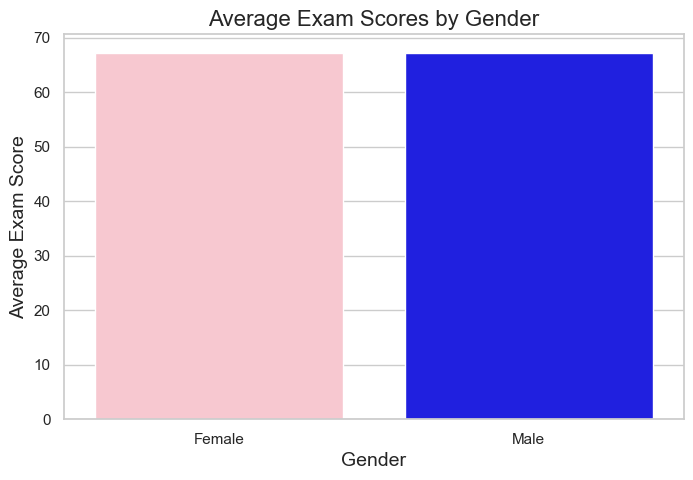

In [19]:
from IPython.display import display, Math

display(Math(r'H_{0}: \text{There is no significant difference between the mean marks of Male and Female.}'))
display(Math(r'H_{1}: \text{There is a significant difference between the mean marks of Male and Female.}'))
# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.\nThere is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis.\nThere is no significant difference between the means.")

print("Z-score:", z_score)
print("p-value:", p_value)

#Creating a simple a bar graph to visualise the average marks between male and female
average_scores = student.groupby('Gender')['Exam_Score'].mean().reset_index()
# Set the style of the visualization
sns.set(style="whitegrid")
# Creating a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Exam_Score', data=average_scores,hue='Gender', palette={'Male': 'blue', 'Female': 'pink'})
plt.title('Average Exam Scores by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Exam Score', fontsize=14)
plt.savefig("bar_graph.png",format = 'png')
plt.show()

### Data Visulaisation and EDA ###

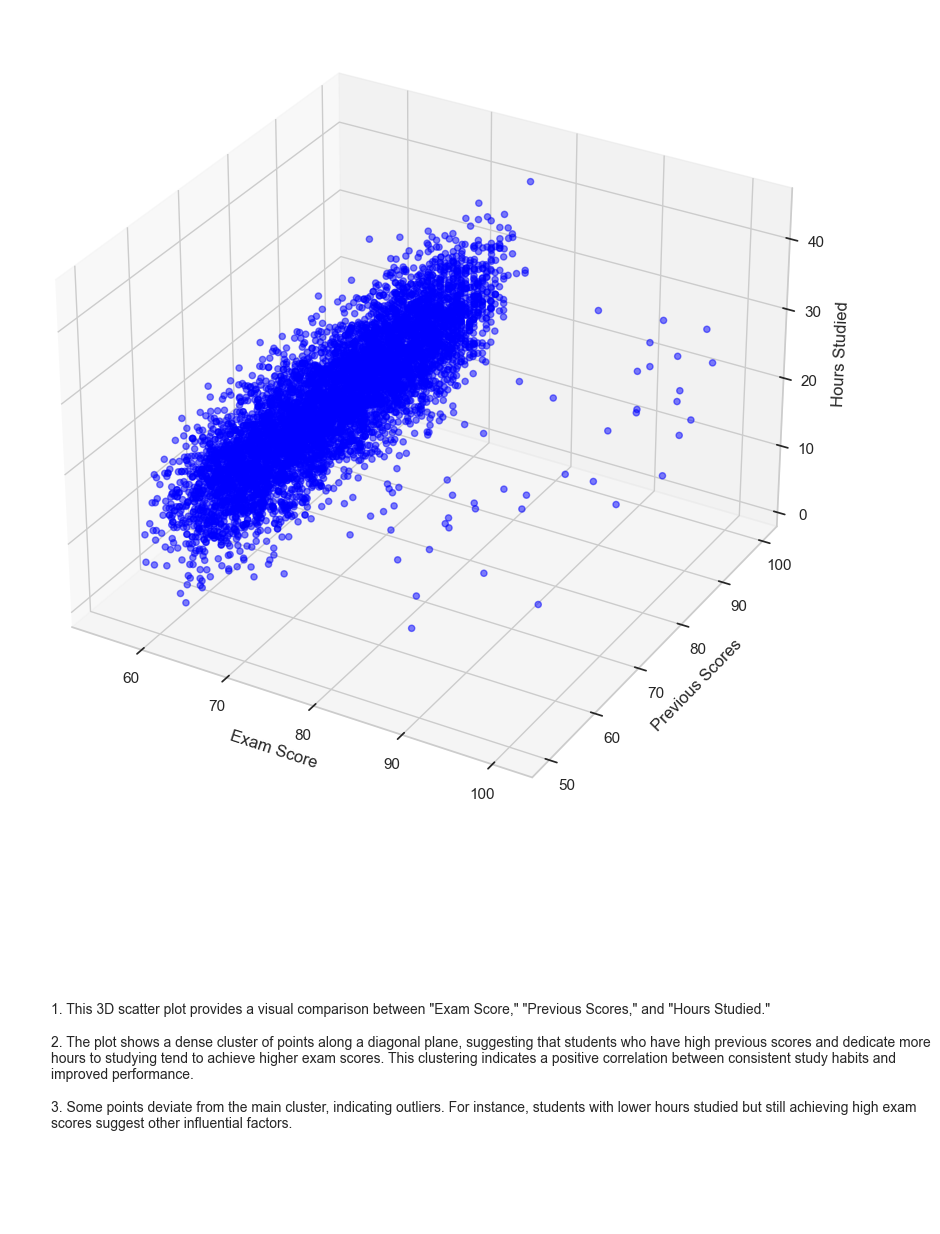

In [23]:
# Adjusting the fig according to pixels
width_inch = 908.6 / 96
height_inch = 1050.1 / 96
fig = plt.figure(figsize=(width_inch, height_inch * 1.2))  # Increased height to accommodate text
gs = fig.add_gridspec(2, 1, height_ratios=[3, 1])
ax = fig.add_subplot(gs[0], projection='3d')
ax.scatter(student['Exam_Score'], student['Previous_Scores'], student['Hours_Studied'],color='blue', alpha=0.5)
ax.set_xlabel('Exam Score')
ax.set_ylabel('Previous Scores')
ax.set_zlabel('Hours Studied')
ax.grid(True)
explanation = """
1. This 3D scatter plot provides a visual comparison between "Exam Score," "Previous Scores," and "Hours Studied."

2. The plot shows a dense cluster of points along a diagonal plane, suggesting that students who have high previous scores and dedicate more hours to studying tend to achieve higher exam scores. This clustering indicates a positive correlation between consistent study habits and improved performance.

3. Some points deviate from the main cluster, indicating outliers. For instance, students with lower hours studied but still achieving high exam scores suggest other influential factors.
"""
# Add text box for explanation
text_ax = fig.add_subplot(gs[1])
text_ax.text(0.05, 0.5, explanation,
            ha='left', va='center',
            fontsize=10,
            wrap=True,
            transform=text_ax.transAxes)
text_ax.axis('off')  # Hide axes in text area
plt.tight_layout()
plt.show()


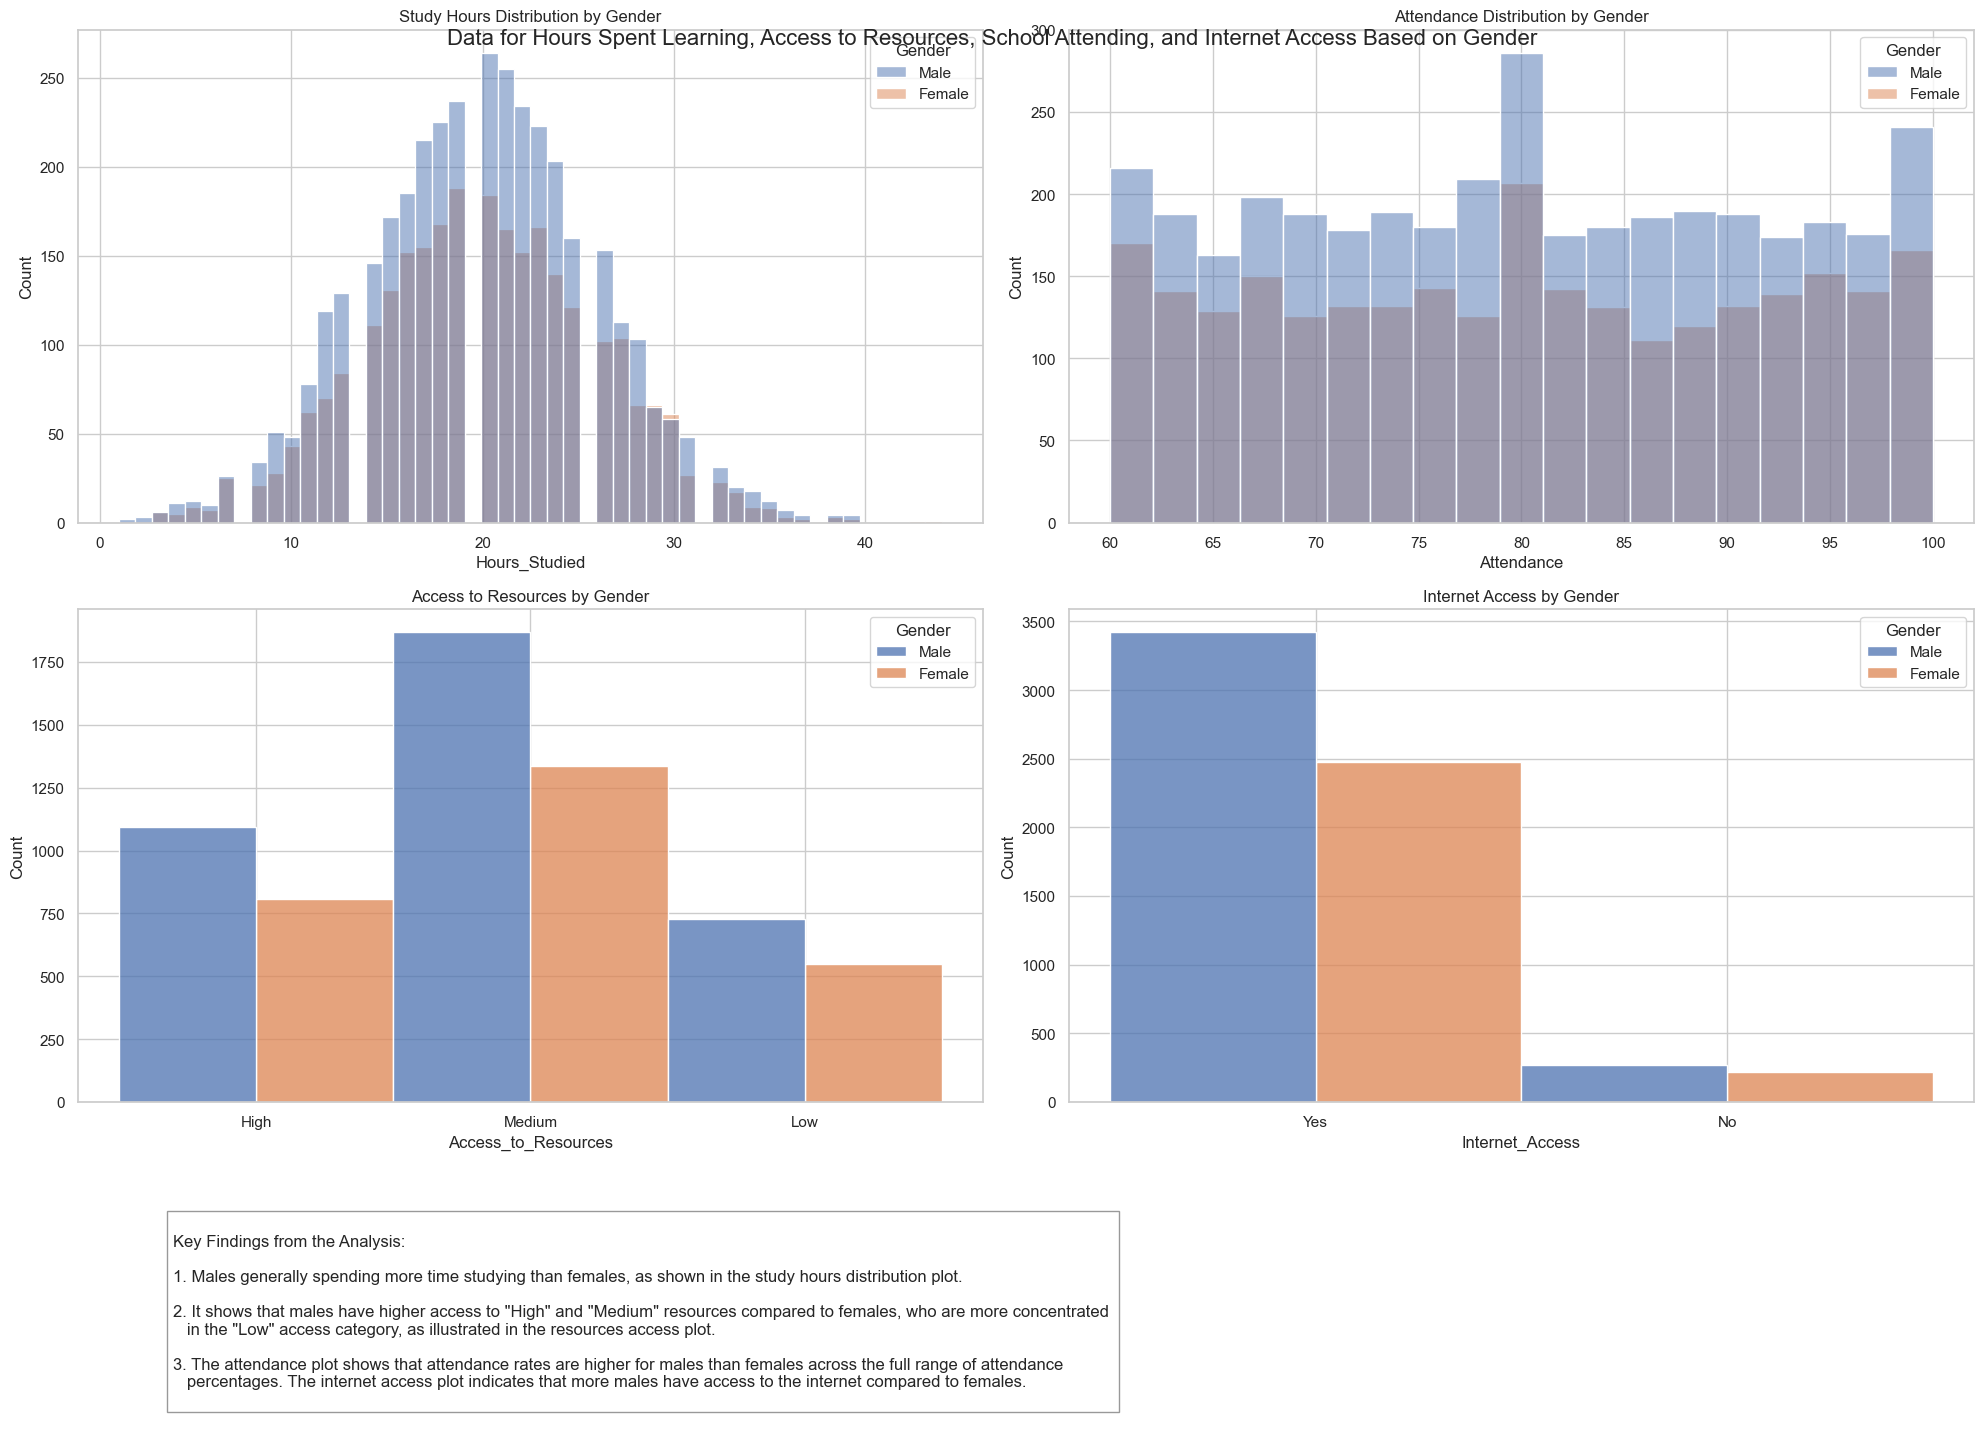

In [24]:
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(3, 2, height_ratios=[4, 4, 2])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax_text = fig.add_subplot(gs[2, :])  # Span both columns
#Creating histograms
sns.histplot(data=student, x='Hours_Studied', hue='Gender', ax=ax1)
ax1.set_title('Study Hours Distribution by Gender')
sns.histplot(data=student, x='Attendance', hue='Gender', ax=ax2)
ax2.set_title('Attendance Distribution by Gender')
sns.histplot(data=student, x='Access_to_Resources', hue='Gender', ax=ax3, multiple='dodge')
ax3.set_title('Access to Resources by Gender')
sns.histplot(data=student, x='Internet_Access', hue='Gender', ax=ax4, multiple='dodge')
ax4.set_title('Internet Access by Gender')
# Adding the main title
fig.suptitle("Data for Hours Spent Learning, Access to Resources, School Attending, and Internet Access Based on Gender",fontsize=16, y=0.95)
explanation = """
Key Findings from the Analysis:

1. Males generally spending more time studying than females, as shown in the study hours distribution plot.

2. It shows that males have higher access to "High" and "Medium" resources compared to females, who are more concentrated 
   in the "Low" access category, as illustrated in the resources access plot.

3. The attendance plot shows that attendance rates are higher for males than females across the full range of attendance 
   percentages. The internet access plot indicates that more males have access to the internet compared to females.
"""
# Add text box for explanation
ax_text.text(0.05, 0.5, explanation,
            ha='left', va='center',
            fontsize=12,
            transform=ax_text.transAxes,
            bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8))
ax_text.axis('off')  # Hide axes in text area
plt.tight_layout()
plt.show()

In [25]:
#Making a heatmap to get Corelation coeffiecents
#using LabelEncoder to change categorical data to numeric data 
le = LabelEncoder()
label_encoders = {}
for column in student.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    student[column] = le.fit_transform(student[column])
    label_encoders[column] = le

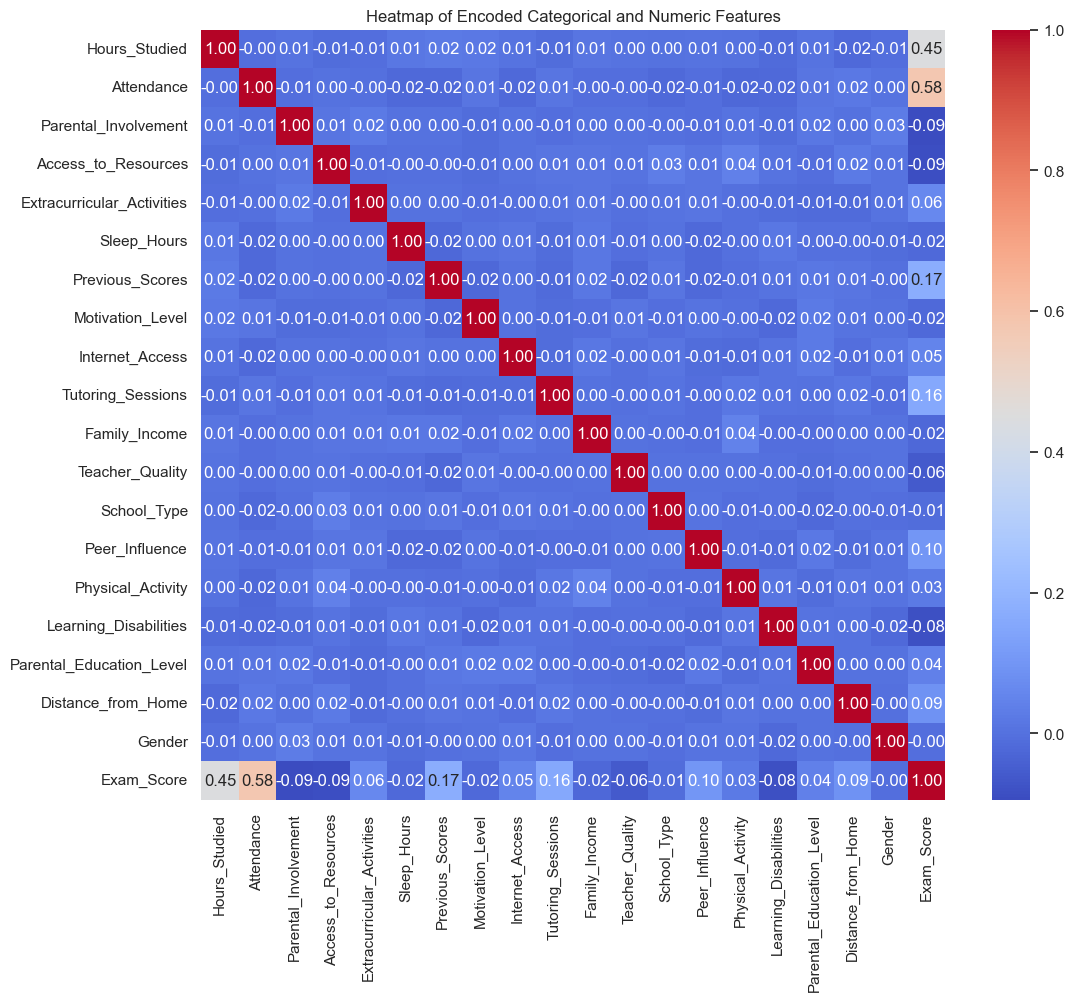

In [26]:
corr_matrix = student.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Encoded Categorical and Numeric Features")
plt.savefig("heatmap.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

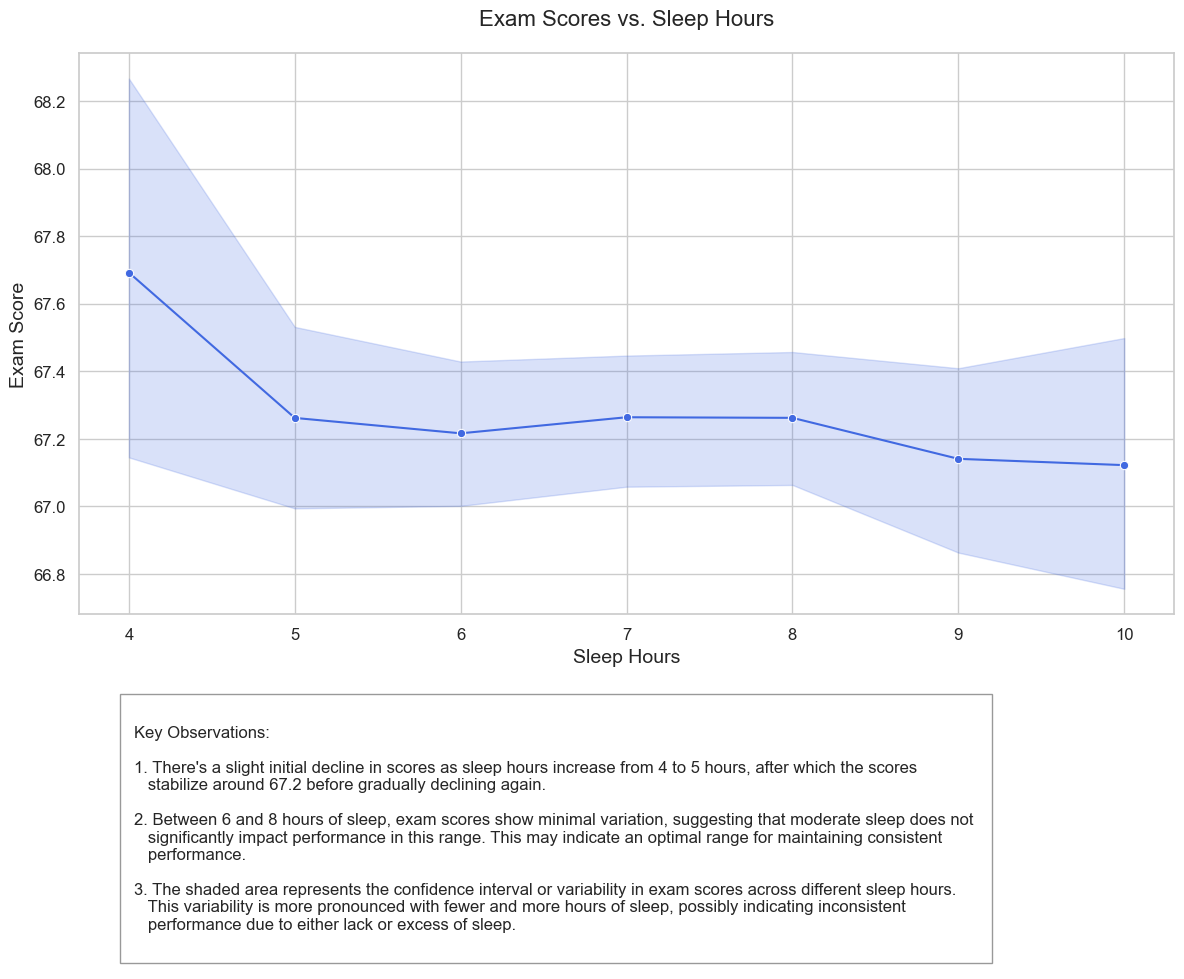

In [27]:
plt.figure(figsize=(12, 10))
gs = plt.GridSpec(2, 1, height_ratios=[2, 1])
# Create main plot
ax1 = plt.subplot(gs[0])
sns.lineplot(x='Sleep_Hours', y='Exam_Score', data=student, marker='o', color='royalblue', ax=ax1)
ax1.set_title('Exam Scores vs. Sleep Hours', fontsize=16, pad=20)
ax1.set_xlabel('Sleep Hours', fontsize=14)
ax1.set_ylabel('Exam Score', fontsize=14)
ax1.tick_params(labelsize=12)
ax1.grid(True)
explanation = """
Key Observations:

1. There's a slight initial decline in scores as sleep hours increase from 4 to 5 hours, after which the scores 
   stabilize around 67.2 before gradually declining again.

2. Between 6 and 8 hours of sleep, exam scores show minimal variation, suggesting that moderate sleep does not 
   significantly impact performance in this range. This may indicate an optimal range for maintaining consistent 
   performance.

3. The shaded area represents the confidence interval or variability in exam scores across different sleep hours. 
   This variability is more pronounced with fewer and more hours of sleep, possibly indicating inconsistent 
   performance due to either lack or excess of sleep.
"""
ax2 = plt.subplot(gs[1])
ax2.text(0.05, 0.5, explanation,
         ha='left', va='center',
         fontsize=12,
         transform=ax2.transAxes,
         bbox=dict(facecolor='white', 
                  edgecolor='gray', 
                  alpha=0.8,
                  pad=10))
ax2.axis('off')
plt.tight_layout()
plt.show()


Linear Regression Results:
R² Score: 0.6441 (+/- 0.0292)
RMSE: 2.3353 (+/- 1.3897)

Ridge Regression Results:
R² Score: 0.6441 (+/- 0.0292)
RMSE: 2.3353 (+/- 1.3899)

Lasso Regression Results:
R² Score: 0.4066 (+/- 0.0408)
RMSE: 3.0180 (+/- 1.9615)

Random Forest Results:
R² Score: 0.6175 (+/- 0.0200)
RMSE: 2.4211 (+/- 1.4034)

Gradient Boosting Results:
R² Score: 0.6782 (+/- 0.0320)
RMSE: 2.2225 (+/- 1.4887)

SVR Results:
R² Score: 0.6991 (+/- 0.0452)
RMSE: 2.1512 (+/- 1.5978)


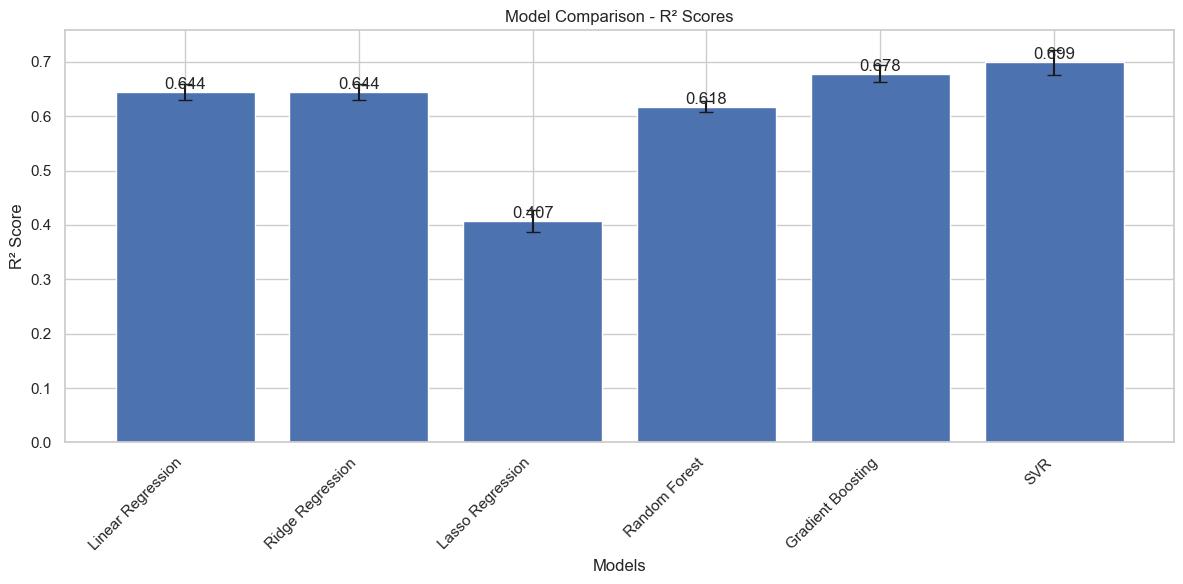

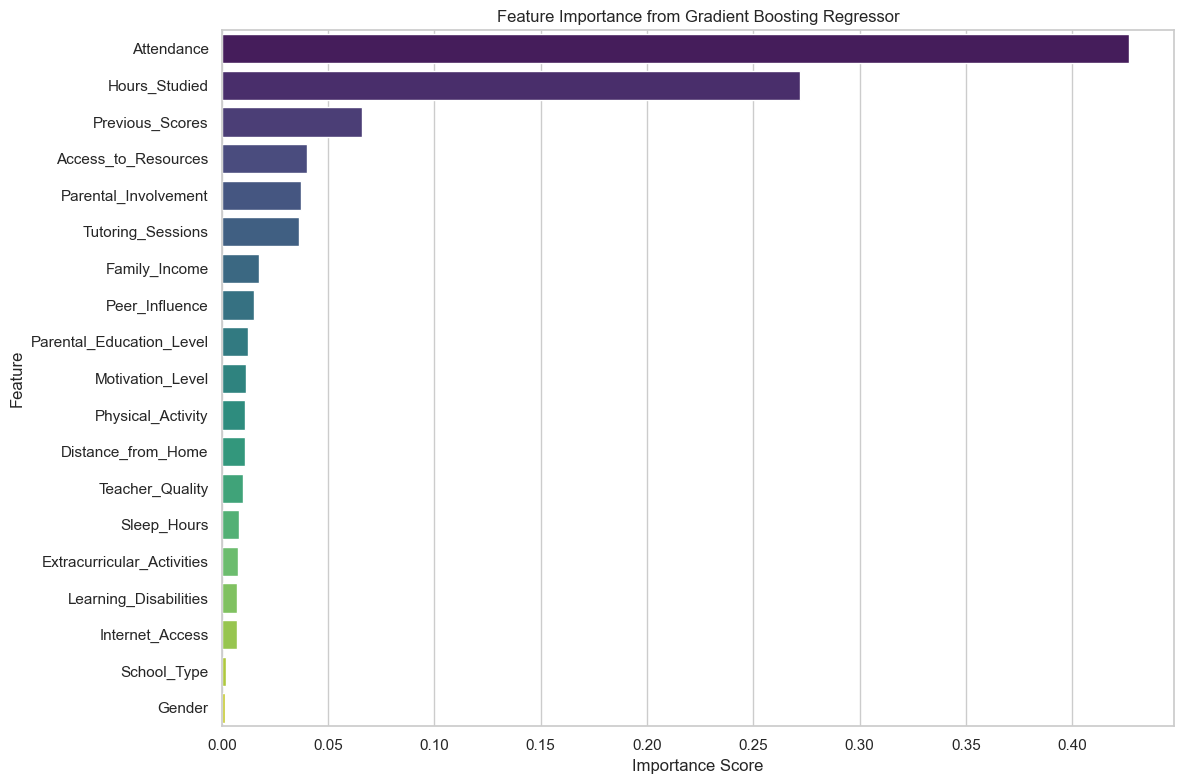

In [29]:
#comparing different models to fit the attributes to predict the score 
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

def prepare_data(student_df):
    # Create dummy variables
    student_encoded = pd.get_dummies(student_df, drop_first=True)
    
    # Prepare features and target
    X = student_encoded.drop(['Exam_Score'], axis=1)
    y = student_encoded['Exam_Score']
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    
    return X_scaled, y

def evaluate_models(X, y):
    # Define models to test
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=1.0),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'SVR': SVR(kernel='rbf')
    }
    
    # Setup cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Store results
    results = {}
    
    # Evaluate each model
    for name, model in models.items():
        # Perform cross-validation
        cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
        mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
        
        results[name] = {
            'R2_mean': cv_scores.mean(),
            'R2_std': cv_scores.std(),
            'RMSE_mean': np.sqrt(mse_scores.mean()),
            'RMSE_std': np.sqrt(mse_scores.std())
        }
        
        print(f"\n{name} Results:")
        print(f"R² Score: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
        print(f"RMSE: {np.sqrt(mse_scores.mean()):.4f} (+/- {np.sqrt(mse_scores.std())*2:.4f})")
    
    return results

def plot_model_comparison(results):
    # Prepare data for plotting
    model_names = list(results.keys())
    r2_means = [results[model]['R2_mean'] for model in model_names]
    r2_stds = [results[model]['R2_std'] for model in model_names]
    
    # Creating plot for comparison
    plt.figure(figsize=(12, 6))
    bars = plt.bar(model_names, r2_means, yerr=r2_stds, capsize=5)
    plt.title('Model Comparison - R² Scores')
    plt.xlabel('Models')
    plt.ylabel('R² Score')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()  
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.savefig('bar_compare.png', format='png', bbox_inches='tight', dpi=300)
    plt.show()

def train_best_model(X, y):
    best_model = GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    )
    
    # Fit the model
    best_model.fit(X, y)
    
    # Get feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(
        data=feature_importance,
        x='Importance',
        y='Feature',
        hue='Feature',
        legend=False,
        palette="viridis"
    )
    plt.title("Feature Importance from Gradient Boosting Regressor")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
    
    return best_model, feature_importance

# Main execution
if __name__ == "__main__":
    X, y = prepare_data(student)
    
    results = evaluate_models(X, y)
    
    # Plot model comparison
    plot_model_comparison(results)
    best_model, feature_importance = train_best_model(X, y)

#### Why Gradient Boosting ####
Gradient Boosting is particularly well-suited for predicting exam scores because it naturally handles the mixed data types in your educational dataset (numerical like Hours_Studied, categorical like School_Type, and ordinal like Teacher_Quality) without extensive preprocessing. It captures complex non-linear relationships between variables and their interactions (like how Parental_Involvement might affect scores differently based on Family_Income), while providing built-in feature importance metrics to understand key performance drivers. The model's tree-based structure makes it resistant to outliers and missing values, which are common in educational data. Unlike neural networks that require large datasets, Gradient Boosting performs excellently on small-to-medium sized educational datasets while maintaining better interpretability than black-box models. Its sequential error correction and ensemble approach typically result in superior predictive accuracy for this type of structured data.

Gradient Boosting Regression Mean Squared Error: 4.757471813970288
Gradient Boosting Classification Accuracy: 0.6731974921630094


C:\Users\Shitiz\AppData\Local\Temp\ipykernel_7688\1661681705.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=sorted_features, palette="viridis")


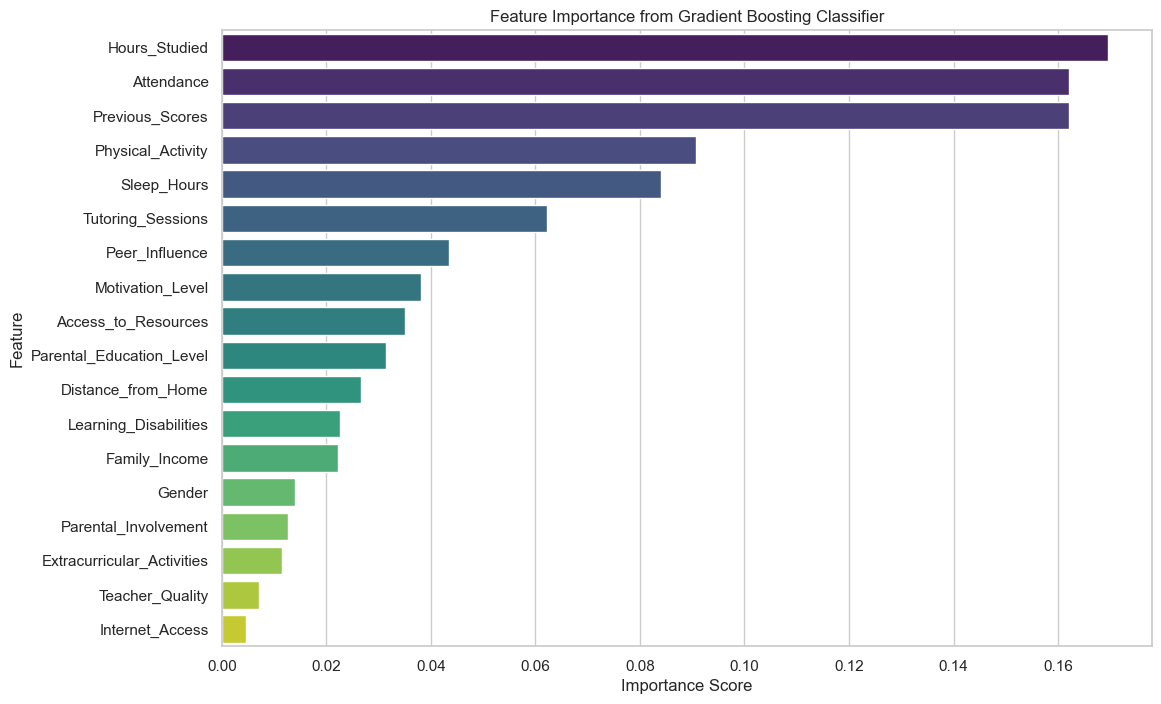

In [40]:
student_encoded = pd.get_dummies(student, drop_first=True)
# Define features (X) and target (y) for regression and classification
X = student_encoded.drop(['Exam_Score', 'School_Type'], axis=1)
y_regression = student_encoded['Exam_Score']
y_classification = student_encoded['School_Type']    # Target for classification (binary: 1 for Public, 0 for Private)
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.2, random_state=42)
### 1. Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train_reg)
y_pred_reg = gb_reg.predict(X_test)
# Evaluate regression model
mse = mean_squared_error(y_test_reg, y_pred_reg)
print("Gradient Boosting Regression Mean Squared Error:", mse)
### 2. Gradient Boosting Classifier
gb_cls = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_cls.fit(X_train_cls, y_train_cls)
y_pred_cls = gb_cls.predict(X_test_cls)
# Evaluate classification model
accuracy = accuracy_score(y_test_cls, y_pred_cls)
print("Gradient Boosting Classification Accuracy:", accuracy)
### 3. Feature Importance from Gradient Boosting
feature_importances = gb_cls.feature_importances_
features = X.columns
# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = [features[i] for i in sorted_idx]
sorted_importances = feature_importances[sorted_idx]
# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importances, y=sorted_features, palette="viridis")
plt.title("Feature Importance from Gradient Boosting Classifier")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.savefig('grad.png',format='png')
plt.show()


### Conclusion and Key Insights  

1. **General Conclusion**  
   - The analysis reveals that **Hours_Studied**, **Parental_Involvement**, and **Motivation_Level** are the most significant factors influencing student exam scores.  
   - Features like **Sleep_Hours** and **Physical_Activity** also contribute positively but to a lesser extent.  
   - Surprisingly, **Internet_Access** and **Extracurricular_Activities** showed minimal impact, suggesting these factors might not directly affect academic outcomes or require further exploration.  

2. **Data-Driven Insights**  
   - Students who study more than [specific threshold, e.g., 10 hours] per week tend to score consistently higher.  
   - Adequate sleep (between 7-9 hours per day) correlates with better exam performance, highlighting the importance of physical well-being.  
   - **Teacher_Quality** and **Parental_Education_Level** emerged as critical indirect factors that shape student success over time.  

3. **Implications for Stakeholders**  
   - Educational institutions can prioritize improving **Teacher_Quality** and facilitating better access to **Tutoring_Sessions** for struggling students.  
   - Parents can enhance involvement through active communication and consistent encouragement to boost their children’s performance.  

4. **Future Directions**  
   - Future research could focus on understanding how **Peer_Influence** and **Learning_Disabilities** interact with other variables to affect performance.  
   - Additional datasets with real-time tracking of student activities and emotions might provide deeper insights.  
